In [64]:
# Kütüphaneler
import pandas as pd # veri yönetimi
import numpy as np # hesaplamalar
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

# Veri seti yükleme
file_path = 'wdbc.data' 

# Veri setini yükleme işlemi
# WNBC veri setinde header satırı yoktur. header=None belirtilmezse ilk satır header olarak alınır
try:
    df = pd.read_csv(file_path, header=None) 

    # Veri Hazırlık Aşaması

    # Sütun tanımlama
    column_names = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

    # Sütun isimlerini atama
    df.columns = column_names

    # ID sütununu kaldırma
    # Özellikler (X) ve Hedef (Y) oluşturma
    Y = df['diagnosis']
    X = df.drop(['id', 'diagnosis'], axis=1)

    print("\n\nVeri hazırlığı tamamlandı!\n")
    print("Hedef değişkenin (Y) ilk 5 satırı:\n", Y.head())
    print("Özelliklerin (X) ilk 5 satırı:\n", X.head())
    
except FileNotFoundError:
    print("Hata! Dosya bulunamadı. Lütfen dosyanın adını ve yolunu kontrol ediniz.")



Veri hazırlığı tamamlandı!

Hedef değişkenin (Y) ilk 5 satırı:
 0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object
Özelliklerin (X) ilk 5 satırı:
    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3      11.42      20.38      77.58      386.1    0.14250    0.28390   
4      20.29      14.34     135.10     1297.0    0.10030    0.13280   

   feature_7  feature_8  feature_9  feature_10  ...  feature_21  feature_22  \
0     0.3001    0.14710     0.2419     0.07871  ...       25.38       17.33   
1     0.0869    0.07017     0.1812     0.05667  ...       24.99       23.41   
2     0.1974    0.12790     0.2069     0.05999  ...       23.57       25.53   
3     0.2414    0.10520     0.2597     0.09744  ...       14.91       26.50   
4     0.1980  

In [65]:
    # İlk 5 satırı göster
    print("Veri setinin ilk 5 satırı: \n")
    df.head()

Veri setinin ilk 5 satırı: 



,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [66]:
# Veri setinin boyutu
print("Veri setinin boyutu: \n(Satır, Sütun)")
df.shape

Veri setinin boyutu: 
(Satır, Sütun)


(569, 32)

In [67]:
# VERİ ÖN İŞLEME (ÖLÇEKLENDİRME)

# LabelEncoder nesnesini oluştur
le = LabelEncoder()

# y değişkenini dönüştür (M -> 1, B -> 0 veya tam tersi)
y_encoded = le.fit_transform(Y)

# Sonuç: y_encoded, artık sayısal hedef değişkenimiz

In [68]:
# Eksik değer kontrolü
eksik_deger_sayisi = X.isnull().sum().sum()

# Sonucu yazdırma
print(f"Özellikler matrisindeki (X) toplam eksik değer sayısı: {eksik_deger_sayisi}")

Özellikler matrisindeki (X) toplam eksik değer sayısı: 0


In [69]:
# Veri standartlaştırma

print("Veriler standartlaştırılıyor...")
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# Standartlaştırma öncesi istatistikler
print(" Standartlaştırma Öncesi Özelliklerin İstatistikleri:\n")
print(X.describe().T[['mean', 'std', 'min', 'max']])

# Standartlaştırma sonrası istatistikler
print("\n Standartlaştırma Sonrası Özelliklerin İstatistikleri:\n")
print(X_scaled.describe().T[['mean', 'std', 'min', 'max']])

Veriler standartlaştırılıyor...
 Standartlaştırma Öncesi Özelliklerin İstatistikleri:

                  mean         std         min         max
feature_1    14.127292    3.524049    6.981000    28.11000
feature_2    19.289649    4.301036    9.710000    39.28000
feature_3    91.969033   24.298981   43.790000   188.50000
feature_4   654.889104  351.914129  143.500000  2501.00000
feature_5     0.096360    0.014064    0.052630     0.16340
feature_6     0.104341    0.052813    0.019380     0.34540
feature_7     0.088799    0.079720    0.000000     0.42680
feature_8     0.048919    0.038803    0.000000     0.20120
feature_9     0.181162    0.027414    0.106000     0.30400
feature_10    0.062798    0.007060    0.049960     0.09744
feature_11    0.405172    0.277313    0.111500     2.87300
feature_12    1.216853    0.551648    0.360200     4.88500
feature_13    2.866059    2.021855    0.757000    21.98000
feature_14   40.337079   45.491006    6.802000   542.20000
feature_15    0.007041    0.

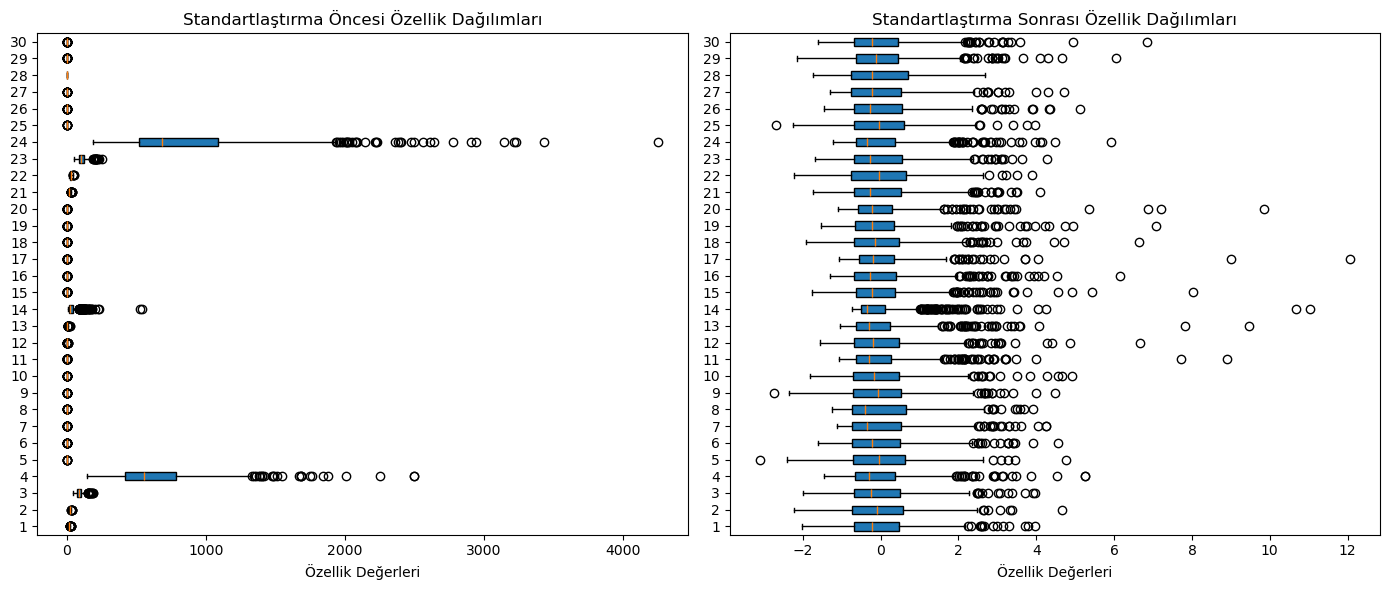

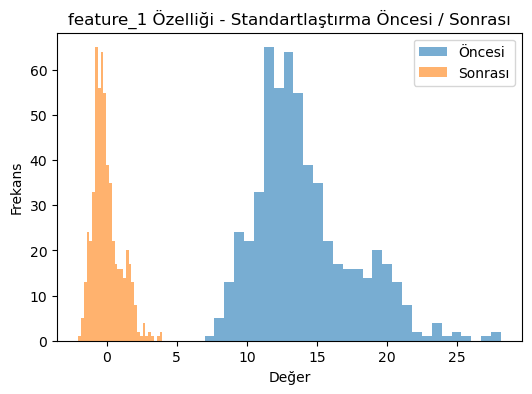

In [70]:
# Görsel karşılaştırma
plt.figure(figsize=(14,6))

# Öncesi
plt.subplot(1,2,1)
plt.boxplot(X, vert=False, patch_artist=True)
plt.title("Standartlaştırma Öncesi Özellik Dağılımları")
plt.xlabel("Özellik Değerleri")

# Sonrası
plt.subplot(1,2,2)
plt.boxplot(X_scaled, vert=False, patch_artist=True)
plt.title("Standartlaştırma Sonrası Özellik Dağılımları")
plt.xlabel("Özellik Değerleri")

plt.tight_layout()
plt.show()

ozellik = 'feature_1'  # İstediğin sütunu seç
plt.figure(figsize=(6,4))
plt.hist(X[ozellik], bins=30, alpha=0.6, label='Öncesi')
plt.hist(X_scaled[ozellik], bins=30, alpha=0.6, label='Sonrası')
plt.legend()
plt.title(f"{ozellik} Özelliği - Standartlaştırma Öncesi / Sonrası")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.show()

K-Means algoritması çalıştırılıyor...


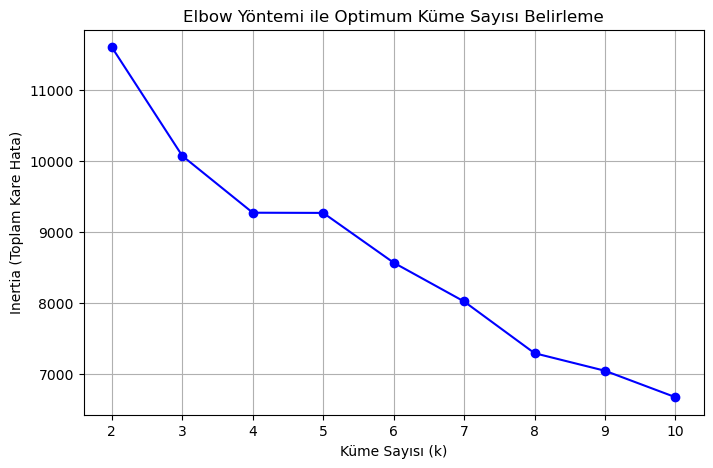


Elbow grafiğine göre 'dirsek' noktası optimum küme sayısını verir.



In [71]:
# K-MEANS KÜMELEME

print("K-Means algoritması çalıştırılıyor...")

# Farklı k değerleri için K-Means modelleri
inertia_values = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Elbow grafiği çizimi
plt.figure(figsize=(8,5))
plt.plot(K, inertia_values, 'o-', color='b')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (Toplam Kare Hata)')
plt.title('Elbow Yöntemi ile Optimum Küme Sayısı Belirleme')
plt.grid(True)
plt.show()

print("\nElbow grafiğine göre 'dirsek' noktası optimum küme sayısını verir.\n")



Silhouette skoru hesaplanıyor...


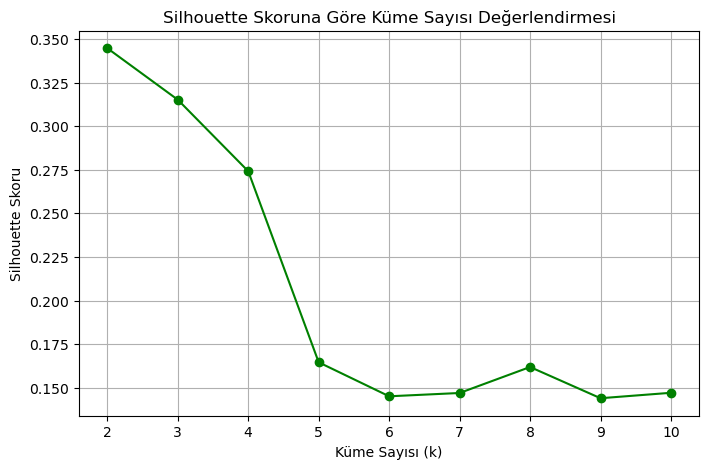

En yüksek Silhouette skoru: 0.345 (k = 2)


In [74]:
print("\nSilhouette skoru hesaplanıyor...")

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Skor grafiği
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'o-', color='g')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Skoruna Göre Küme Sayısı Değerlendirmesi')
plt.grid(True)
plt.show()

# En iyi k değeri
best_k = range(2, 11)[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"En yüksek Silhouette skoru: {best_score:.3f} (k = {best_k})")

In [77]:
# DBSCAN KÜMELEME

print("\nDBSCAN algoritması çalıştırılıyor...")

# eps ve min_samples parametreleri veriye göre ayarlanabilir
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Küme etiketleri ve gürültü (-1)
unique_labels = np.unique(dbscan_labels)
print(f"Oluşan kümeler: {unique_labels}")
print("Her kümedeki örnek sayısı:")
print(pd.Series(dbscan_labels).value_counts())



DBSCAN algoritması çalıştırılıyor...
Oluşan kümeler: [-1  0]
Her kümedeki örnek sayısı:
-1    550
 0     19
Name: count, dtype: int64


In [78]:
# OPTİMUM KÜME SAYISI İLE MODEL OLUŞTURMA

print("\n" + "="*60)
print("OPTİMUM KÜME SAYISI İLE FİNAL MODELLERİ OLUŞTURULUYOR")
print("="*60)

# K-Means için optimum k değeri ile final model
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

print(f"\nK-Means ile {best_k} küme oluşturuldu.")
print("K-Means küme dağılımı:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

# DBSCAN için (zaten yukarıda oluşturulmuş)
print(f"\nDBSCAN ile {len(unique_labels[unique_labels >= 0])} küme oluşturuldu.")
print(f"Gürültü olarak etiketlenen nokta sayısı: {sum(dbscan_labels == -1)}")




OPTİMUM KÜME SAYISI İLE FİNAL MODELLERİ OLUŞTURULUYOR

K-Means ile 2 küme oluşturuldu.
K-Means küme dağılımı:
0    188
1    381
Name: count, dtype: int64

DBSCAN ile 1 küme oluşturuldu.
Gürültü olarak etiketlenen nokta sayısı: 550


In [79]:
# DEĞERLENDİRME

print("DEĞERLENDİRME: KÜME ETİKETLERİ İLE GERÇEK SINIFLARIN KARŞILAŞTIRILMASI")

print("\n--- DEĞERLENDİRME METRİKLERİ ---\n")

# K-Means için metrikler
kmeans_ari = adjusted_rand_score(y_encoded, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(y_encoded, kmeans_labels)
kmeans_homogeneity = homogeneity_score(y_encoded, kmeans_labels)
kmeans_completeness = completeness_score(y_encoded, kmeans_labels)
kmeans_v_measure = v_measure_score(y_encoded, kmeans_labels)

print("K-MEANS DEĞERLENDİRME SONUÇLARI:")
print(f"  • Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"  • Normalized Mutual Information (NMI): {kmeans_nmi:.4f}")
print(f"  • Homogeneity Score: {kmeans_homogeneity:.4f}")
print(f"  • Completeness Score: {kmeans_completeness:.4f}")
print(f"  • V-Measure Score: {kmeans_v_measure:.4f}")

# DBSCAN için metrikler (gürültü noktalarını hariç tutarak)
# Gürültü noktalarını filtreleme
valid_indices = dbscan_labels != -1
y_encoded_filtered = y_encoded[valid_indices]
dbscan_labels_filtered = dbscan_labels[valid_indices]
if len(np.unique(dbscan_labels_filtered)) > 1:
    dbscan_ari = adjusted_rand_score(y_encoded_filtered, dbscan_labels_filtered)
    dbscan_nmi = normalized_mutual_info_score(y_encoded_filtered, dbscan_labels_filtered)
    dbscan_homogeneity = homogeneity_score(y_encoded_filtered, dbscan_labels_filtered)
    dbscan_completeness = completeness_score(y_encoded_filtered, dbscan_labels_filtered)
    dbscan_v_measure = v_measure_score(y_encoded_filtered, dbscan_labels_filtered)
    
    print("\nDBSCAN DEĞERLENDİRME SONUÇLARI (Gürültü noktaları hariç):")
    print(f"  • Adjusted Rand Index (ARI): {dbscan_ari:.4f}")
    print(f"  • Normalized Mutual Information (NMI): {dbscan_nmi:.4f}")
    print(f"  • Homogeneity Score: {dbscan_homogeneity:.4f}")
    print(f"  • Completeness Score: {dbscan_completeness:.4f}")
    print(f"  • V-Measure Score: {dbscan_v_measure:.4f}")
else:
    print("\nDBSCAN: Yeterli küme oluşmadı, değerlendirme yapılamıyor.")


DEĞERLENDİRME: KÜME ETİKETLERİ İLE GERÇEK SINIFLARIN KARŞILAŞTIRILMASI

--- DEĞERLENDİRME METRİKLERİ ---

K-MEANS DEĞERLENDİRME SONUÇLARI:
  • Adjusted Rand Index (ARI): 0.6765
  • Normalized Mutual Information (NMI): 0.5620
  • Homogeneity Score: 0.5510
  • Completeness Score: 0.5735
  • V-Measure Score: 0.5620

DBSCAN: Yeterli küme oluşmadı, değerlendirme yapılamıyor.


In [80]:
# KARŞILAŞTIRMA TABLOSU

print("\n--- KARŞILAŞTIRMA TABLOSU ---\n")

comparison_df = pd.DataFrame({
    'Metrik': ['ARI', 'NMI', 'Homogeneity', 'Completeness', 'V-Measure'],
    'K-Means': [kmeans_ari, kmeans_nmi, kmeans_homogeneity, kmeans_completeness, kmeans_v_measure]
})

if len(np.unique(dbscan_labels_filtered)) > 1:
    comparison_df['DBSCAN'] = [dbscan_ari, dbscan_nmi, dbscan_homogeneity, dbscan_completeness, dbscan_v_measure]

print(comparison_df.to_string(index=False))


--- KARŞILAŞTIRMA TABLOSU ---

      Metrik  K-Means
         ARI 0.676505
         NMI 0.562021
 Homogeneity 0.551019
Completeness 0.573471
   V-Measure 0.562021


In [81]:
# CONFUSION MATRIX TABANLARI KARŞILAŞTIRMA

print("\n--- KÜME VE GERÇEK SINIF DAĞILIMLARI ---\n")

# K-Means için confusion matrix benzeri tablo
print("K-MEANS: Küme ve Gerçek Sınıf Çapraz Tablosu")
kmeans_crosstab = pd.crosstab(kmeans_labels, y_encoded, 
                                rownames=['Küme'], 
                                colnames=['Gerçek Sınıf (0=B, 1=M)'])
print(kmeans_crosstab)

# Her kümenin saflığı (purity)
print("\nK-Means - Her Kümenin Saflığı:")
for cluster in range(best_k):
    cluster_mask = kmeans_labels == cluster
    cluster_true_labels = y_encoded[cluster_mask]
    if len(cluster_true_labels) > 0:
        # numpy array için pd.Series'e çevir veya np.unique kullan
        unique, counts = np.unique(cluster_true_labels, return_counts=True)
        purity = counts.max() / len(cluster_true_labels)
        dominant_class = unique[counts.argmax()]
        print(f"  Küme {cluster}: %{purity*100:.1f} saflık (Baskın sınıf: {'M' if dominant_class == 1 else 'B'})")

# DBSCAN için
if len(np.unique(dbscan_labels_filtered)) > 1:
    print("\n\nDBSCAN: Küme ve Gerçek Sınıf Çapraz Tablosu (Gürültü hariç)")
    dbscan_crosstab = pd.crosstab(dbscan_labels_filtered, y_encoded_filtered,
                                   rownames=['Küme'],
                                   colnames=['Gerçek Sınıf (0=B, 1=M)'])
    print(dbscan_crosstab)
    
    print("\nDBSCAN - Her Kümenin Saflığı:")
    for cluster in np.unique(dbscan_labels_filtered):
        cluster_mask = dbscan_labels_filtered == cluster
        cluster_true_labels = y_encoded_filtered[cluster_mask]
        if len(cluster_true_labels) > 0:
            unique, counts = np.unique(cluster_true_labels, return_counts=True)
            purity = counts.max() / len(cluster_true_labels)
            dominant_class = unique[counts.argmax()]
            print(f"  Küme {cluster}: %{purity*100:.1f} saflık (Baskın sınıf: {'M' if dominant_class == 1 else 'B'})")


--- KÜME VE GERÇEK SINIF DAĞILIMLARI ---

K-MEANS: Küme ve Gerçek Sınıf Çapraz Tablosu
Gerçek Sınıf (0=B, 1=M)    0    1
Küme                             
0                         13  175
1                        344   37

K-Means - Her Kümenin Saflığı:
  Küme 0: %93.1 saflık (Baskın sınıf: M)
  Küme 1: %90.3 saflık (Baskın sınıf: B)



Özelliklerin dağılım grafikleri oluşturuluyor...


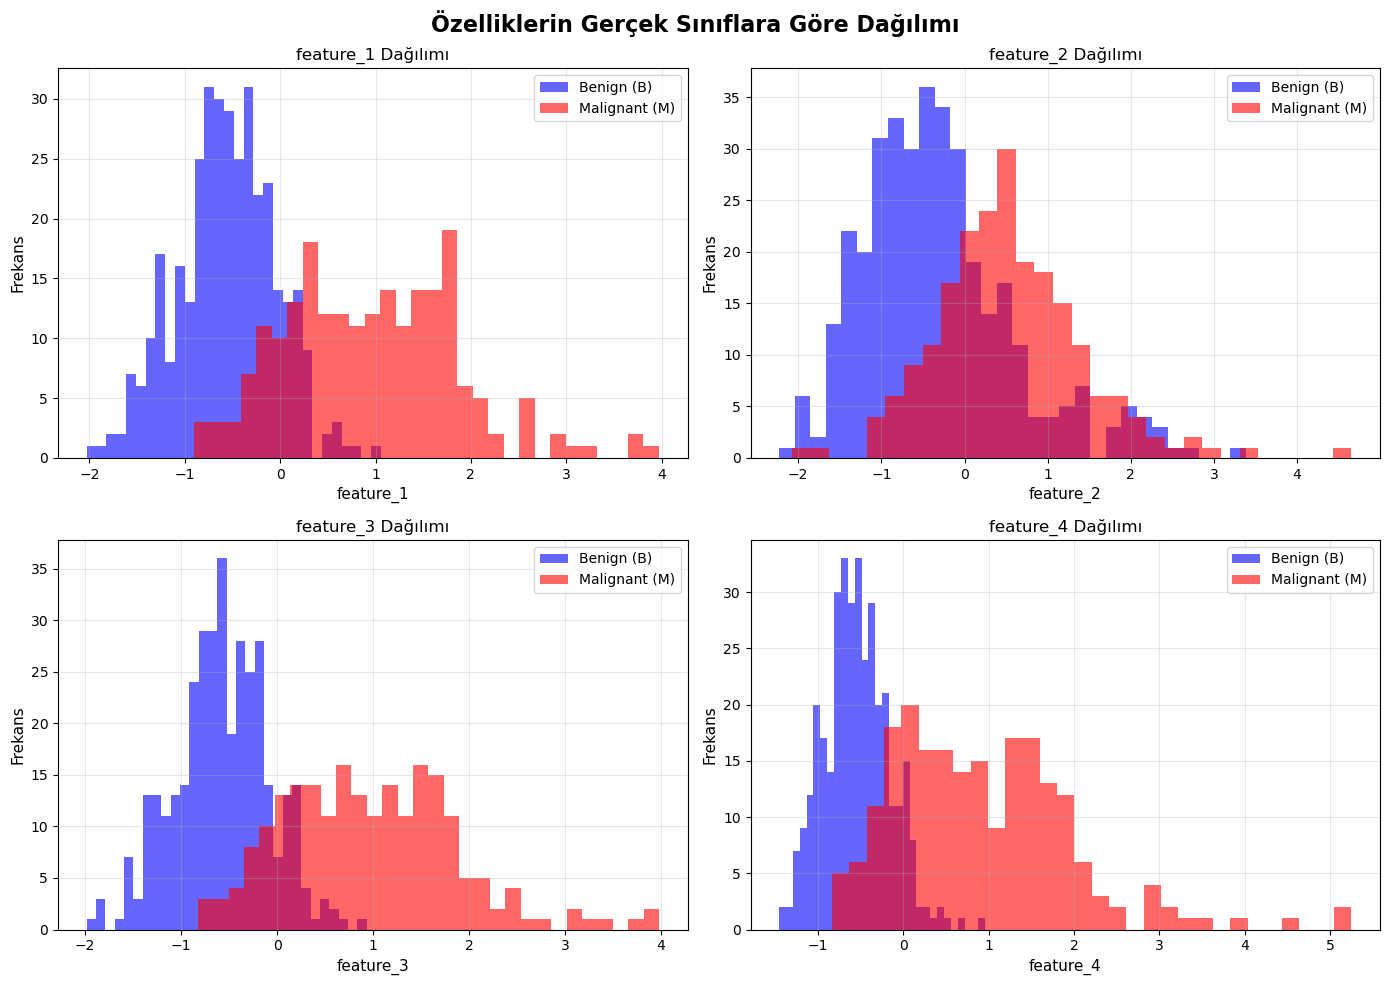

In [82]:
# GÖRSELLEŞTİRME
# ÖZELLİKLERİN DAĞILIMI

print("\nÖzelliklerin dağılım grafikleri oluşturuluyor...")

# İlk 4 özellik için dağılım grafikleri
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Özelliklerin Gerçek Sınıflara Göre Dağılımı', fontsize=16, fontweight='bold')

features_to_plot = ['feature_1', 'feature_2', 'feature_3', 'feature_4']
for idx, feature in enumerate(features_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    # Benign (0) ve Malignant (1) için ayrı histogramlar
    ax.hist(X_scaled[y_encoded == 0][feature], bins=30, alpha=0.6, label='Benign (B)', color='blue')
    ax.hist(X_scaled[y_encoded == 1][feature], bins=30, alpha=0.6, label='Malignant (M)', color='red')
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Frekans', fontsize=11)
    ax.set_title(f'{feature} Dağılımı', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [83]:
# PCA İLE 2D İNDİRGEME VE GÖRSELLEŞTIRME
from sklearn.decomposition import PCA

print("\nPCA ile 2 boyuta indirgeme yapılıyor...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA ile açıklanan varyans oranı: %{pca.explained_variance_ratio_.sum()*100:.2f}")
print(f"  • PC1: %{pca.explained_variance_ratio_[0]*100:.2f}")
print(f"  • PC2: %{pca.explained_variance_ratio_[1]*100:.2f}")



PCA ile 2 boyuta indirgeme yapılıyor...
PCA ile açıklanan varyans oranı: %63.24
  • PC1: %44.27
  • PC2: %18.97



2D Scatter plot grafikleri oluşturuluyor...



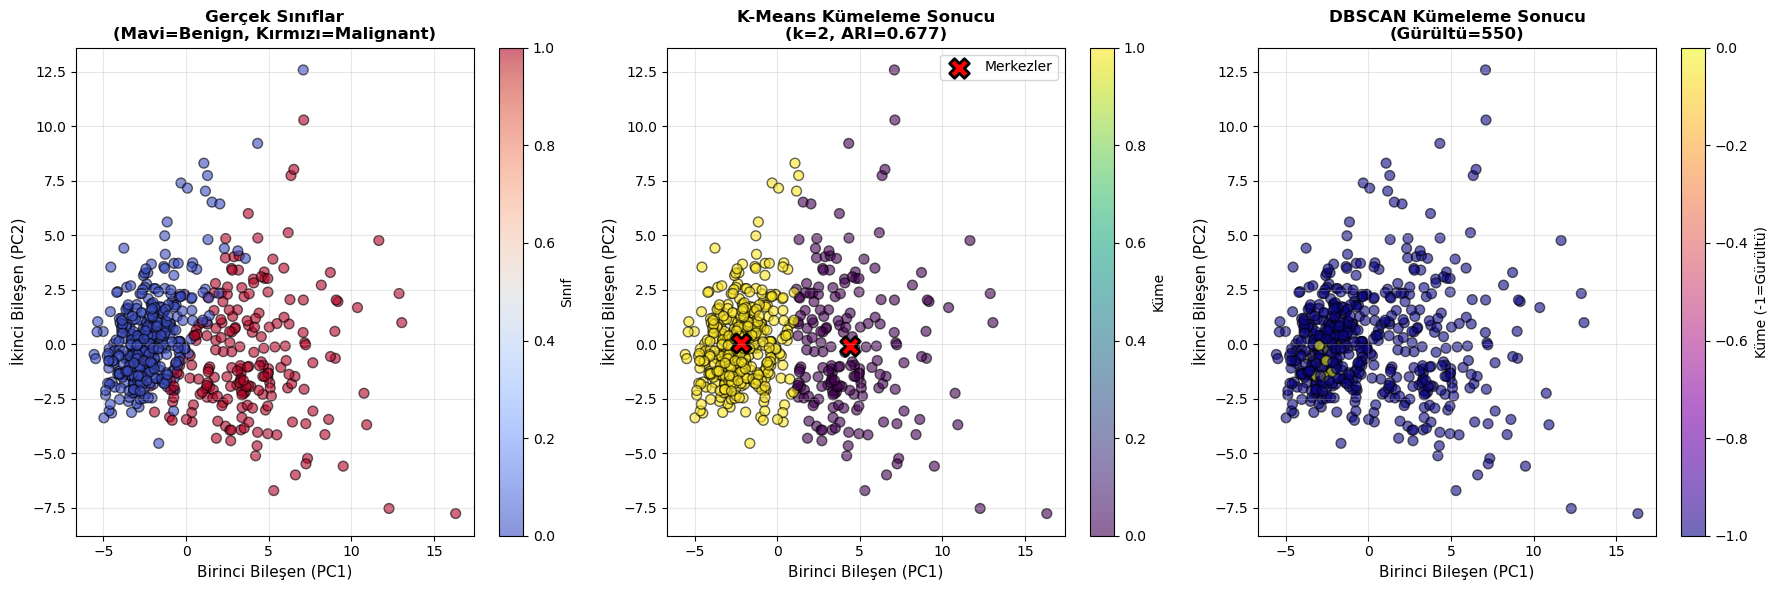

In [84]:
# KÜME SONUÇLARININ 2D SCATTER PLOT GÖRSELLEŞTİRMESİ
print("\n2D Scatter plot grafikleri oluşturuluyor...\n")

fig = plt.figure(figsize=(18, 6))

# 5.3.1 Gerçek Sınıflar
ax1 = fig.add_subplot(131)
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='coolwarm', 
                       alpha=0.6, edgecolors='k', s=50)
ax1.set_xlabel('Birinci Bileşen (PC1)', fontsize=11)
ax1.set_ylabel('İkinci Bileşen (PC2)', fontsize=11)
ax1.set_title('Gerçek Sınıflar\n(Mavi=Benign, Kırmızı=Malignant)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Sınıf')

# 5.3.2 K-Means Kümeleme Sonucu
warnings.filterwarnings('ignore', category=UserWarning)

ax2 = fig.add_subplot(132)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', 
                       alpha=0.6, edgecolors='k', s=50)
ax2.set_xlabel('Birinci Bileşen (PC1)', fontsize=11)
ax2.set_ylabel('İkinci Bileşen (PC2)', fontsize=11)
ax2.set_title(f'K-Means Kümeleme Sonucu\n(k={best_k}, ARI={kmeans_ari:.3f})', 
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
fig.colorbar(scatter2, ax=ax2, label='Küme')

# Küme merkezlerini göster
centers_pca = pca.transform(kmeans_final.cluster_centers_)
ax2.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', 
           s=200, edgecolors='black', linewidths=2, label='Merkezler')
ax2.legend()

# 5.3.3 DBSCAN Kümeleme Sonucu
ax3 = fig.add_subplot(133)
scatter3 = ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', 
                       alpha=0.6, edgecolors='k', s=50)
ax3.set_xlabel('Birinci Bileşen (PC1)', fontsize=11)
ax3.set_ylabel('İkinci Bileşen (PC2)', fontsize=11)

if len(np.unique(dbscan_labels_filtered)) > 1:
    ax3.set_title(f'DBSCAN Kümeleme Sonucu\n(ARI={dbscan_ari:.3f}, Gürültü={sum(dbscan_labels==-1)})', 
                  fontsize=12, fontweight='bold')
else:
    ax3.set_title(f'DBSCAN Kümeleme Sonucu\n(Gürültü={sum(dbscan_labels==-1)})', 
                  fontsize=12, fontweight='bold')

ax3.grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=ax3, label='Küme (-1=Gürültü)')

plt.tight_layout()
plt.show()


Confusion matrix görselleri oluşturuluyor...



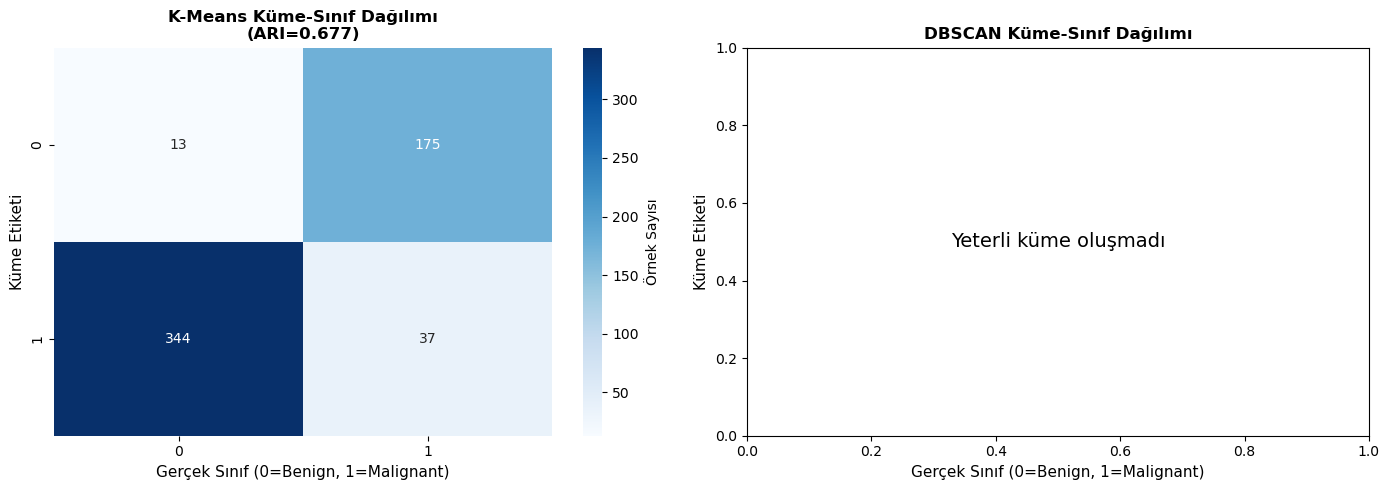

In [85]:
# CONFUSION MATRIX GÖRSELLEŞTİRMESİ

print("\nConfusion matrix görselleri oluşturuluyor...\n")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# K-Means Confusion Matrix
sns.heatmap(kmeans_crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            cbar_kws={'label': 'Örnek Sayısı'})
axes[0].set_title(f'K-Means Küme-Sınıf Dağılımı\n(ARI={kmeans_ari:.3f})', 
                  fontsize=12, fontweight='bold')
axes[0].set_ylabel('Küme Etiketi', fontsize=11)
axes[0].set_xlabel('Gerçek Sınıf (0=Benign, 1=Malignant)', fontsize=11)

# DBSCAN Confusion Matrix
if len(np.unique(dbscan_labels_filtered)) > 1:
    sns.heatmap(dbscan_crosstab, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
                cbar_kws={'label': 'Örnek Sayısı'})
    axes[1].set_title(f'DBSCAN Küme-Sınıf Dağılımı\n(ARI={dbscan_ari:.3f}, Gürültü Hariç)', 
                      fontsize=12, fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'Yeterli küme oluşmadı', 
                ha='center', va='center', fontsize=14)
    axes[1].set_title('DBSCAN Küme-Sınıf Dağılımı', fontsize=12, fontweight='bold')

axes[1].set_ylabel('Küme Etiketi', fontsize=11)
axes[1].set_xlabel('Gerçek Sınıf (0=Benign, 1=Malignant)', fontsize=11)

plt.tight_layout()
plt.show()


Metrik karşılaştırma grafiği oluşturuluyor...



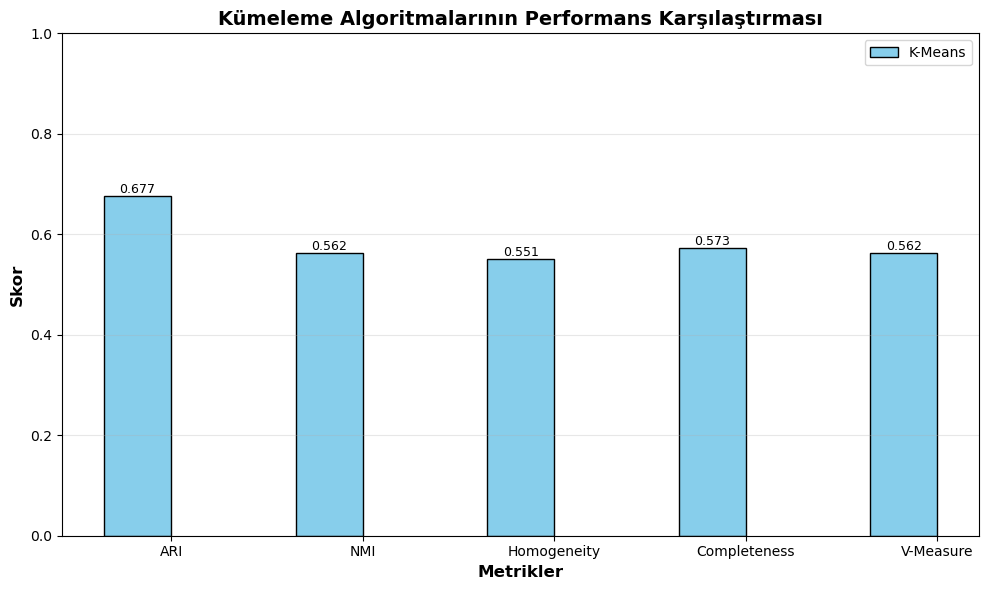

In [47]:
# METRİK KARŞILAŞTIRMA GRAFİĞİ

print("\nMetrik karşılaştırma grafiği oluşturuluyor...\n")

fig, ax = plt.subplots(figsize=(10, 6))

metrics = ['ARI', 'NMI', 'Homogeneity', 'Completeness', 'V-Measure']
kmeans_scores = [kmeans_ari, kmeans_nmi, kmeans_homogeneity, kmeans_completeness, kmeans_v_measure]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, kmeans_scores, width, label='K-Means', color='skyblue', edgecolor='black')

if len(np.unique(dbscan_labels_filtered)) > 1:
    dbscan_scores = [dbscan_ari, dbscan_nmi, dbscan_homogeneity, dbscan_completeness, dbscan_v_measure]
    bars2 = ax.bar(x + width/2, dbscan_scores, width, label='DBSCAN', color='lightcoral', edgecolor='black')

ax.set_xlabel('Metrikler', fontsize=12, fontweight='bold')
ax.set_ylabel('Skor', fontsize=12, fontweight='bold')
ax.set_title('Kümeleme Algoritmalarının Performans Karşılaştırması', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', alpha=0.3)
ax.set_ylim(0, 1)

# Bar değerlerini göster
for bars in [bars1] + ([bars2] if len(np.unique(dbscan_labels_filtered)) > 1 else []):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [89]:
# SONUÇ ÖZETİ

print("SONUÇ ÖZETİ")
print(f"""
✓ Veri Seti: {X.shape[0]} örnek, {X.shape[1]} özellik
✓ Gerçek Sınıflar: {sum(y_encoded==0)} Benign, {sum(y_encoded==1)} Malignant

K-MEANS SONUÇLARI:
  • Küme Sayısı: {best_k}
  • ARI Skoru: {kmeans_ari:.4f}
  • NMI Skoru: {kmeans_nmi:.4f}
  • Silhouette Skoru: {best_score:.4f}

DBSCAN SONUÇLARI:
  • Küme Sayısı: {len(np.unique(dbscan_labels[dbscan_labels >= 0]))}
  • Gürültü Sayısı: {sum(dbscan_labels == -1)}""")

if len(np.unique(dbscan_labels_filtered)) > 1:
    print(f"  • ARI Skoru: {dbscan_ari:.4f}")
    print(f"  • NMI Skoru: {dbscan_nmi:.4f}")

print("\nDeğerlendirme ve görselleştirme tamamlandı!")

SONUÇ ÖZETİ

✓ Veri Seti: 569 örnek, 30 özellik
✓ Gerçek Sınıflar: 357 Benign, 212 Malignant

K-MEANS SONUÇLARI:
  • Küme Sayısı: 2
  • ARI Skoru: 0.6765
  • NMI Skoru: 0.5620
  • Silhouette Skoru: 0.3447

DBSCAN SONUÇLARI:
  • Küme Sayısı: 1
  • Gürültü Sayısı: 550

Değerlendirme ve görselleştirme tamamlandı!
